<a href="https://colab.research.google.com/github/meghla97/EDA/blob/main/TextData_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import numpy as np


In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
data = pd.read_excel('/content/Privacy_Calculus(2).xlsx')

In [15]:
data.head(5)

,Paper Title,Text Excerpt,Sentiment,Privacy risk(s),Privacy Benefit(s),Trust factor(s)
0,The Use of Financial Apps: Privacy\nParadox or...,Irrespective of people’s general privacy atiti...,Mixed,Inappropriate data handling,NaN,Data handling practices
1,The Use of Financial Apps: Privacy\nParadox or...,These apps are still relatively new and unknow...,Mixed,Potential for misuse,NaN,Social proof
2,Payments data: do consumers want banks to keep...,"Formost people, a financial incentive in the f...",Negative,Misuse of payments data,Merchant offers,Data handling practices
3,Payments data: do consumers want banks to keep...,People who use socialmedia are more positive t...,Positive,Unauthorized profiling,Financial guidance,Financial well-being
4,Examining the Intention of Authorization via A...,Users who have had negative experiences with p...,Neutral,Misuse of personal information,NaN,Past experiences


# Preprocessing

In [25]:
from collections import Counter
from nltk.tokenize import word_tokenize

In [20]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

# Set of English stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
# Tokenization
data['tokens'] = data['Text Excerpt'].apply(word_tokenize)

# Remove stopwords
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop])


In [33]:
#Punctuation
import string

In [35]:
# Remove punctuation and tokenize
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    return tokens

# Apply preprocessing
data['tokens'] = data['Text Excerpt'].apply(preprocess_text)


In [37]:
data.head(5)

,Paper Title,Text Excerpt,Sentiment,Privacy risk(s),Privacy Benefit(s),Trust factor(s),tokens
0,The Use of Financial Apps: Privacy\nParadox or...,Irrespective of people’s general privacy atiti...,Mixed,Inappropriate data handling,NaN,Data handling practices,"[Irrespective, of, people, ’, s, general, priv..."
1,The Use of Financial Apps: Privacy\nParadox or...,These apps are still relatively new and unknow...,Mixed,Potential for misuse,NaN,Social proof,"[These, apps, are, still, relatively, new, and..."
2,Payments data: do consumers want banks to keep...,"Formost people, a financial incentive in the f...",Negative,Misuse of payments data,Merchant offers,Data handling practices,"[Formost, people, a, financial, incentive, in,..."
3,Payments data: do consumers want banks to keep...,People who use socialmedia are more positive t...,Positive,Unauthorized profiling,Financial guidance,Financial well-being,"[People, who, use, socialmedia, are, more, pos..."
4,Examining the Intention of Authorization via A...,Users who have had negative experiences with p...,Neutral,Misuse of personal information,NaN,Past experiences,"[Users, who, have, had, negative, experiences,..."


# Word Frequency Analysis

In [31]:
import seaborn as sns

In [22]:
# Basic statistics
print("Number of rows:", len(data))
print("Number of unique text entries:", len(data['Text Excerpt'].unique()))

Number of rows: 22
Number of unique text entries: 22


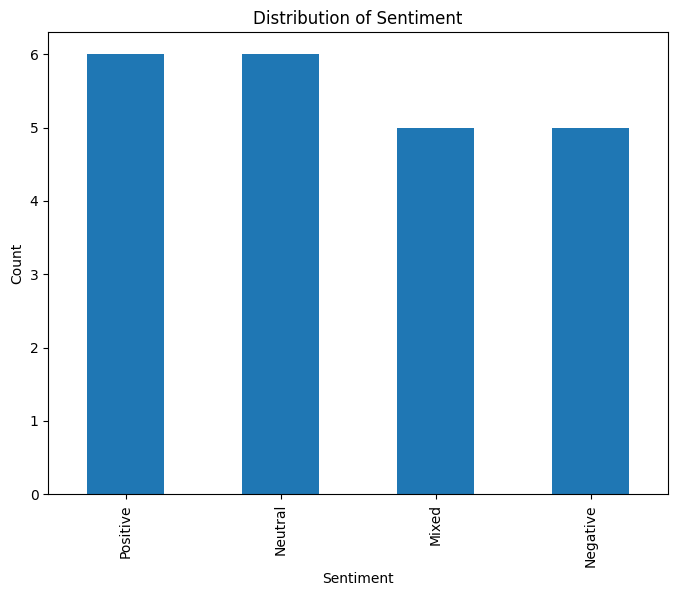

In [18]:
# Distribution of sentiment
plt.figure(figsize=(8, 6))
data['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [29]:
# Word frequency analysis
all_words = [word for tokens in data['tokens'] for word in tokens]
word_freq = Counter(all_words)
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

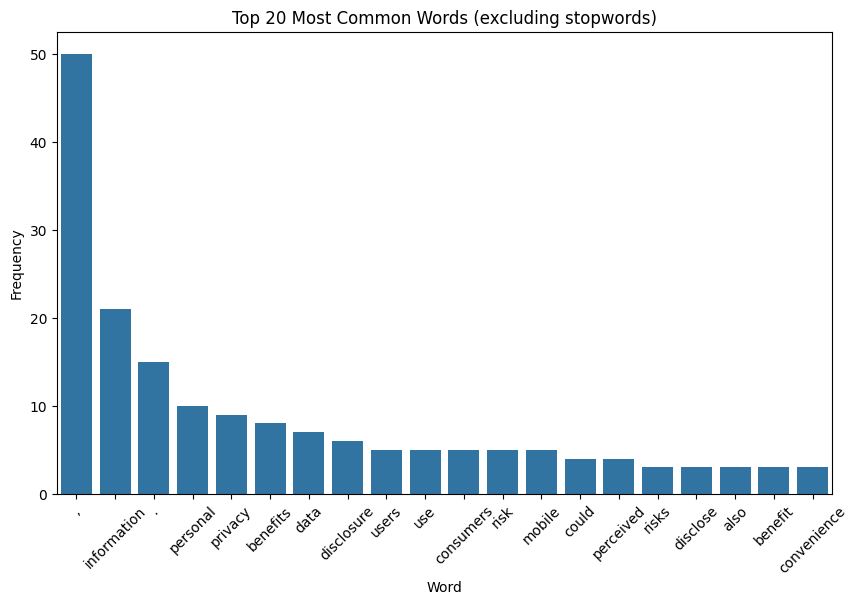

In [32]:
# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(20))
plt.title('Top 20 Most Common Words (excluding stopwords)')
plt.xticks(rotation=45)
plt.show()

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

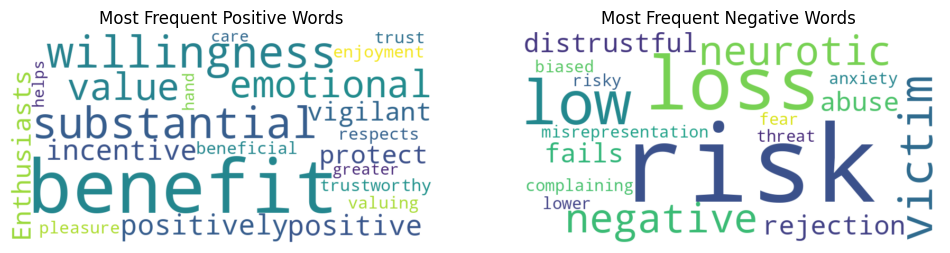

In [45]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Count positive and negative words
def count_sentiment_words(tokens):
    pos_words = []
    neg_words = []
    for token in tokens:
        score = sid.polarity_scores(token)
        if score['compound'] > 0:
            pos_words.append(token)
        elif score['compound'] < 0:
            neg_words.append(token)
    return pos_words, neg_words

data['positive_words'], data['negative_words'] = zip(*data['tokens'].apply(count_sentiment_words))

# Concatenate all positive and negative words
all_pos_words = [word for words in data['positive_words'] for word in words]
all_neg_words = [word for words in data['negative_words'] for word in words]

# Create word clouds for positive and negative words
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_pos_words))
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_neg_words))

# Plot the word clouds
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Positive Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Negative Words')
plt.axis('off')

plt.show()

In [49]:
from collections import Counter

# Count occurrences of words in positive and negative sentiment
positive_word_freq = Counter(all_pos_words)
negative_word_freq = Counter(all_neg_words)

In [50]:
# Negetive words
from collections import Counter
pd.DataFrame(Counter(negative_word_freq).most_common(10))

,0,1
0,risk,5
1,risks,3
2,loss,3
3,low,2
4,victim,1
5,negative,1
6,neurotic,1
7,distrustful,1
8,abuse,1
9,fails,1


In [51]:
# Positive Words
pd.DataFrame(Counter(positive_word_freq).most_common(10))

,0,1
0,benefits,8
1,benefit,3
2,willingness,2
3,substantial,2
4,emotional,2
5,positively,1
6,incentive,1
7,positive,1
8,vigilant,1
9,Enthusiasts,1
